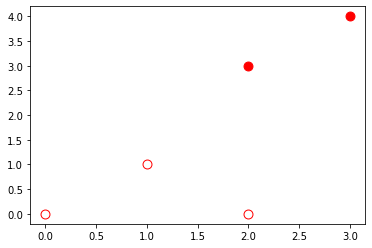

prediction:
x1 = 3, x2 = 3, y = B
x1 = 4, x2 = 0, y = A
x1 = 2, x2 = 2, y = B
x1 = 1, x2 = 2, y = A

intercept (b): [-2.2]
coefficient (w1, w2): [[0.4 0.8]]

number of support vectors for each class: [1 1]
indices of support vectors: [1 2]
support vectors (x1, x2):
 [[1. 1.]
 [2. 3.]]


In [1]:
#example 6-1

import matplotlib.pyplot as plt
from sklearn.svm import SVC

x = [[0, 0], [1, 1], [2, 3], [2, 0], [3, 4]]
y = ['A', 'A', 'B', 'A', 'B']

#วาดทีละจุด
for (i, p) in enumerate(x):
    c = 'w' if y[i] == 'A' else 'r' #marker color
    plt.scatter(p[0], p[1], color=c, marker='o', edgecolors='r', s=80)  #s = marker_size (points**2)

plt.show()

model = SVC(kernel='linear')
model.fit(x, y)

x_predict = [[3, 3], [4, 0], [2, 2], [1, 2]]
y_predicted = model.predict(x_predict)

print('prediction:')
for (i, xp) in enumerate(x_predict):
    print(f'x1 = {xp[0]}, x2 = {xp[1]}, y = {y_predicted[i]}')

print()
print('intercept (b):', model.intercept_)
print('coefficient (w1, w2):', model.coef_)

print()
print('number of support vectors for each class:', model.n_support_)
print('indices of support vectors:', model.support_)
print('support vectors (x1, x2):\n', model.support_vectors_)

,size,price,sold
0,550,50,Yes
1,1000,100,Yes
2,1200,123,Yes
3,1500,350,No
...,...,...,...
7,1500,280,No
8,780,400,No
9,1200,450,No
10,2750,500,No


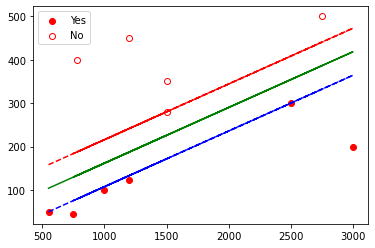

In [7]:
#example 6-2

from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm

df = pd.read_csv(r'data\svm_hyperplane.csv')
with pd.option_context('display.max_rows', 8): display(df)

#แยกข้อมูลเป็น 2 กลุ่มเพื่อวาดกราฟ
#คือ กลุ่มที่ขายได้ และกลุ่มที่ขายไม่ได้

df_yes = df[df['sold'] == 'Yes']
x1 = df_yes['size']
x2 = df_yes['price']
plt.scatter(x1, x2, color='r', label='Yes')

df_no = df[df['sold'] == 'No']
x1 = df_no['size']
x2 = df_no['price']
plt.scatter(x1, x2, color='w', marker='o', edgecolors='r', label='No')

plt.legend(loc='best')
#plt.show()

#--- Train Data ---
x = df[['size', 'price']]
y = df['sold']

model = SVC(kernel='linear')
model.fit(x, y)

b = model.intercept_[0]
w1 = model.coef_[0, 0]
w2 = model.coef_[0, 1]
x1 = df['size']

# --- Plot Hyperplane ---
# b + w1x1 + w2x2 = 0
x2 = (-b -w1 * x1) / w2
plt.plot(x1, x2, 'g-')

# --- Plot Positive Boundary ---
# b + w1x1 + w2x2 = 1
x2 = (1 -b -w1 * x1) / w2
plt.plot(x1, x2, 'b--')

# --- Plot Negative Boundary ---
# b + w1x1 + w2x2 = -1
x2 = (-1 -b -w1 * x1) / w2
plt.plot(x1, x2, 'r--')

plt.show()

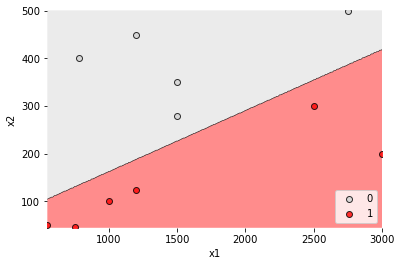

In [3]:
#example 6-3

from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from developerthai.plotting import plot_decision_regions

df = pd.read_csv(r'data\svm_hyperplane.csv')
 
x = df[['size', 'price']]
y = LabelEncoder().fit_transform(df['sold'])

model = SVC(kernel='linear')
model.fit(x, y)

x = np.array(x)
y = np.array(y)

#วาดกราฟด้วยฟังก์ชันที่อิมพอร์ตเข้ามาเพื่อแสดงเส้นแบ่งกลุ่มข้อมูล
#plt.figure(figsize=(4, 3))
plot_decision_regions(x, y, 
                      clf=model, 
                      colors='lightgray,red', 
                      markers='o')

plt.legend(loc=4)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

,weight,size,class
0,69,4.39,orange
1,69,4.21,orange
2,73,5.68,apple
3,70,5.56,apple
...,...,...,...
42,69,4.11,orange
43,69,4.76,orange
44,74,5.48,apple
45,70,5.59,apple


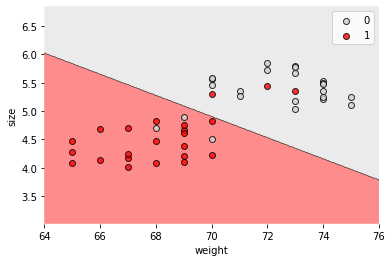

C = 1
Accuracy: 0.87
Number of Support Vectors: [9 9]


In [6]:
#example 6-4

from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from developerthai.plotting import plot_decision_regions

df = pd.read_csv(r'data\apple-orange.csv')
with pd.option_context('display.max_rows', 8): display(df)

x = df[['weight', 'size']]
y = LabelEncoder().fit_transform(df['class'])

c = 1  #ให้เปลี่ยนค่า C เป็นเลขอื่นๆ
model = SVC(kernel='linear', C=c)
model.fit(x, y)

x = np.array(x)
y = np.array(y)

#plt.figure(figsize=(4, 3))
plot_decision_regions(x, y, clf=model, 
                      colors='lightgray,red', markers='o')

plt.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('size')
plt.show()

print(f'C = {c}')
print('Accuracy:', '{:.2f}'.format(model.score(x, y)))
print('Number of Support Vectors:', model.n_support_)

,weight,size,class
0,69,4.39,orange
1,69,4.21,orange
2,73,5.68,apple
3,70,5.56,apple
...,...,...,...
42,69,4.11,orange
43,69,4.76,orange
44,74,5.48,apple
45,70,5.59,apple


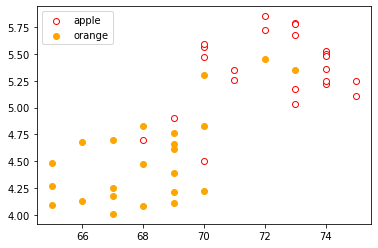


C = 0.1
Accuracy: 0.89
Number of Support Vectors: [11 11]

C = 1.0
Accuracy: 0.87
Number of Support Vectors: [9 9]

C = 10
Accuracy: 0.87
Number of Support Vectors: [8 7]


In [7]:
#example 6-4-test

from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv(r'data\apple-orange.csv')
with pd.option_context('display.max_rows', 8): display(df)

apple = df[df['class'] == 'apple']
x = apple['weight']
y = apple['size']
plt.scatter(x, y, color='w', edgecolor='r', label='apple')

orange = df[df['class'] == 'orange']
x = orange['weight']
y = orange['size']
plt.scatter(x, y, color='orange', marker='o', label='orange')

plt.legend(loc='best')
plt.show()

#------- Test C Parameter -------
x = df[['weight', 'size']]
y = df['class']

def test_c(c):
    model = SVC(kernel='linear', C=c)
    model.fit(x, y)
    print()
    print(f'C = {c}')
    print('Accuracy:', '{:.2f}'.format(model.score(x, y)))
    print('Number of Support Vectors:', model.n_support_)
#end def

test_c(0.1)
test_c(1.0)
test_c(10)

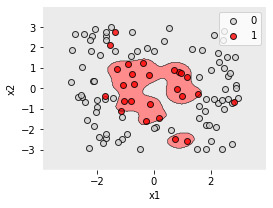

Gamma: 5
Accuracy: 0.96
Support Vectors: [66 26]


In [9]:
#example 6-5

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from developerthai.plotting import plot_decision_regions

df = pd.read_csv(r'data\svm_rbf.csv')
#with pd.option_context('display.max_rows', 8): display(df)

x = df[['x1', 'x2']]
y = df['y']

'''
plt.figure(figsize=(4, 3))
df_yes = df[df['y'] == 0]
x1 = df_yes['x1']
x2 = df_yes['x2']
plt.scatter(x1, x2, color='r', label='0')

df_no = df[df['y'] == 1]
x1 = df_no['x1']
x2 = df_no['x2']
plt.scatter(x1, x2, color='w', marker='o', edgecolors='r', label='1')
plt.show()
'''

g = 5  #เปลี่ยนค่า gamma เพื่อเปรียบเทียบผลลัพธ์
model = SVC(kernel='rbf', gamma=g)
model.fit(x, y)

x = np.array(x)
y = np.array(y)

plt.figure(figsize=(4, 3))
plot_decision_regions(x, y, clf=model, 
                      colors='lightgray,red', markers='o')

plt.legend(loc=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

print('Gamma:', g)
print('Accuracy:', '{:.2f}'.format(model.score(x, y)))
print('Support Vectors:', model.n_support_)

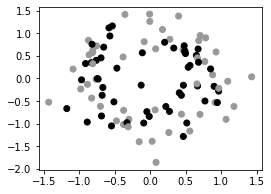

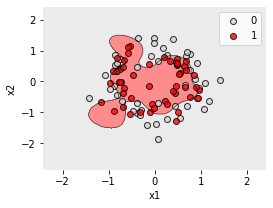

Gamma: 5
Accuracy: 0.75
Support Vectors: [46 46]


In [5]:
#example 6-6

from sklearn.datasets import make_circles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from developerthai.plotting import plot_decision_regions

x, y = make_circles(n_samples=100, noise=0.25, random_state=0)

df = pd.DataFrame(x, columns=['x1', 'x2'])
df['y'] = y
#with pd.option_context('display.max_rows', 6): display(df)

colors = np.array(['#999', '000'])
plt.figure(figsize=(4, 3))
plt.scatter(df['x1'], df['x2'], color=colors[df['y']])
plt.show()

g = 5  #30  #เปลี่ยนค่า gamma เพื่อเปรียบเทียบผลลัพธ์
model = SVC(kernel='rbf', gamma=g)
model.fit(x, y)

#x = np.array(df[['x1', 'x2']])
#y = np.array(df['y'])

plt.figure(figsize=(4, 3))
plot_decision_regions(x, y, clf=model, 
                      colors='lightgray,red', markers='o')

plt.legend(loc=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

print('Gamma:', g)
print('Accuracy:', '{:.2f}'.format(model.score(x, y)))
print('Support Vectors:', model.n_support_)


,x1,x2,y
0,0.042214,0.582815,-1
1,-1.100619,1.144724,1
2,0.901591,0.502494,-1
3,0.900856,-0.683728,1
...,...,...,...
150,-1.021886,0.794528,1
151,0.852704,0.035360,-1
152,-1.873161,0.920615,1
153,-0.035368,2.110605,1


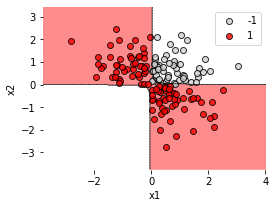

Degree: 2, C: 5
Accuracy: 0.98
Support Vectors: [21 20]


In [30]:
#example 6-7

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from developerthai.plotting import plot_decision_regions

df = pd.read_csv(r'data\svm_poly.csv')
with pd.option_context('display.max_rows', 8): display(df)

x = df[['x1', 'x2']]
y = df['y']

'''
plt.figure(figsize=(4, 3))

df_neg = df[df['y'] == -1]
x1 = df_neg['x1']
x2 = df_neg['x2']
plt.scatter(x1, x2, color='w', marker='o', edgecolors='r', label='-1')

df_pos = df[df['y'] == 1]
x1 = df_pos['x1']
x2 = df_pos['x2']
plt.scatter(x1, x2, color='r', label='1')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='best')
plt.show()
'''

d = 2  #เปลี่ยนค่า degree และ c เพื่อเปรียบเทียบผลลัพธ์
c = 5
model = SVC(kernel='poly', degree=d, C=c)
model.fit(x, y)

x = np.array(x)
y = np.array(y)
plt.figure(figsize=(4, 3))
plot_decision_regions(x, y, clf=model, 
                      colors='lightgray,red', markers='o')

plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

print(f'Degree: {d}, C: {c}')
print('Accuracy:', '{:.2f}'.format(model.score(x, y)))
print('Support Vectors:', model.n_support_)

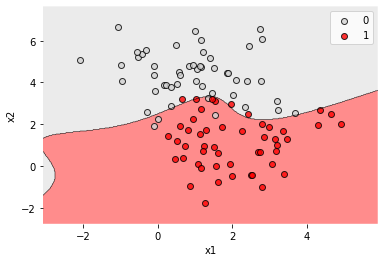

Degree: 5, C: 5
Accuracy: 0.93
Support Vectors: [10 10]


In [15]:
#example 6-7-test

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from developerthai.plotting import plot_decision_regions

df = pd.read_csv(r'data\svm_poly_.csv')
#display(df.head(10))

x = df[['x1', 'x2']]
y = df['y']

'''
df_0 = df[df['y'] == 0]
x1 = df_0['x1']
x2 = df_0['x2']
plt.scatter(x1, x2, color='w', marker='o', edgecolors='r', label='0')

df_1 = df[df['y'] == 1]
x1 = df_1['x1']
x2 = df_1['x2']
plt.scatter(x1, x2, color='r', label='1')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='best')
plt.show()
'''

d = 5
c = 5
model = SVC(kernel='poly', degree=d, C=c)
model.fit(x, y)

x = np.array(x)
y = np.array(y)

plot_decision_regions(x, y, clf=model, colors='lightgray,red', markers='o')

plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

print(f'Degree: {d}, C: {c}')
print('Accuracy:', '{:.2f}'.format(model.score(x, y)))
print('Support Vectors:', model.n_support_)